# Data Visualization

## 0. Loading Libraries
It's a good practice to keep your libraries at the top of your notebook, so that you (1) know which libraries you used, and (2) can load them in neatly whenever you restart your notebook. All the future notebooks will load all necessary libraries right at the top.

If you get an error stating `there is no package called ‘dplyr’`, you'll need to install it using `install.packages()`. This is your last reminder!

In [98]:
library(dplyr)
library(ggplot2)

## 1. Introduction

This notebook introduces ways of manipulating, cleaning, and searching through datasets using R's *dplyr* library. Much of this will be in service to producing better visuals than we could do with just ggplot alone.

## 2. Reading in Data

We'll be using the LEGO® [Rebrickable](https://rebrickable.com/) dataset again, but I haven't done any cleanup on the dataset.

In [129]:
lego <- read.csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/manip/lego.csv")

In [130]:
head(lego)

,set_num,name,year,num_parts,theme
,<chr>,<chr>,<int>,<int>,<chr>
1,00-1,Weetabix Castle,1970,471,Legoland
2,0011-2,Town Mini-Figures,1978,12,Classic Town
3,0011-3,Castle 2 for 1 Bonus Offer,1987,2,Castle
4,0012-1,Space Mini-Figures,1979,12,Space
5,0013-1,Space Mini-Figures,1979,12,Space
6,0014-1,Space Mini-Figures,1979,12,Space


The biggest change is that I haven't remove the smaller themes.

## 3. Basic *dplyr* Functions

The standard functions in *dplyr* you'll be using most of the time in dplyr are:

1. `select()` for including (or excluding) columns.
2. `filter()` for including (or exclusing) rows.
3. `rename()` to rename columns.
4. `mutate()` to modify the contents of columns
5. `summarize()` to calculate basic statistics.
6. `groupby()` to group data by some categorical variable.
7. `arrange()` to reorder a dataframe.

### 3.0. *dplyr* Pipe Notation

One last thing before we begin. It's standard to envision your work in dplyr as a pipeline process: first you do this, then that, then that, and so on until you get a finished, transformed data product. This is done with the `%>%` pipe operator. For example, if you have a dataframe called `data` and you want to call function `A()` on it, then function `B()`, you can write the following:

`data %>% A() %>% B()`

or, storing it in a variable called "`transformed`":

`transformed <- data %>% A() %>% B()`

You may be more used to something like this. If not, then just ignore these two lines of code.

`temp <- A(data)`\
`transformed <- B(temp)`

### 3.1. The `select()` Function

[This function](https://dplyr.tidyverse.org/reference/select.html) is used constantly, both to remove unnecessary columns from a dataframe, and to pick a column to calculate some sort of statistic on. You simply pass as arguments the names of the columns you want to keep:

In [131]:
temp <- lego %>% select(name, year)

head(temp)

,name,year
,<chr>,<int>
1,Weetabix Castle,1970
2,Town Mini-Figures,1978
3,Castle 2 for 1 Bonus Offer,1987
4,Space Mini-Figures,1979
5,Space Mini-Figures,1979
6,Space Mini-Figures,1979


It can sometimes be simpler to just remove a column. The set ID in the `lego` dataframe isn't useful to us, so let's just drop it. I'm storing the result back in `lego`, so that column is now gone forever.

In [132]:
lego <- lego %>% select(-set_num)

head(lego)

,name,year,num_parts,theme
,<chr>,<int>,<int>,<chr>
1,Weetabix Castle,1970,471,Legoland
2,Town Mini-Figures,1978,12,Classic Town
3,Castle 2 for 1 Bonus Offer,1987,2,Castle
4,Space Mini-Figures,1979,12,Space
5,Space Mini-Figures,1979,12,Space
6,Space Mini-Figures,1979,12,Space


### 3.2. The `filter()` Function

[This function](https://dplyr.tidyverse.org/reference/filter.html) uses basic boolean logic to narrow down the rows of interest. Here's an example, where I just want to take a look at the oldest LEGO® sets; they debuted in 1950.

In [133]:
lego %>% filter(year == 1950)

name,year,num_parts,theme
<chr>,<int>,<int>,<chr>
Individual 2 x 4 Bricks,1950,10,Classic
Individual 2 x 2 Bricks,1950,9,Classic
Automatic Binding Bricks Small Brick Set (Lego Mursten),1950,24,Classic
Individual 1 x 4 x 2 Window (without glass),1950,7,Classic
Individual 1 x 2 x 3 Window (without glass),1950,7,Classic
Individual 1 x 2 x 2 Window (without glass),1950,7,Classic
Individual 1 x 2 x 4 Door (without glass),1950,7,Classic


To do so, we passed the phrase `year == 1950`, so R checks every row, and only returns the rows where this expression is true (the `==` sign is a *comparator* that means "is equal to"). The standard comparators in R include:
* `==` equals
* `<` less than
* `>` greater than
* `!=` not equal to
* `<=` greater than or equal to
* `>=` less than or equal to
If you're familiar with boolean logic, you can also use `&` for AND and `|` for OR. Otherwise, you can string together multiple filters if you want multiple things to be true. For example, let's find all of the sets after 2010 that have at least 4000 pieces:

In [134]:
lego %>% filter(year > 2010) %>% filter(num_parts >= 4000)

name,year,num_parts,theme
<chr>,<int>,<int>,<chr>
Big Ben,2016,4166,Model
Assembly Square,2017,4009,Modular Buildings
Personalised Mosaic Portrait,2016,4501,Sculptures
The Disney Castle,2016,4060,Disney
Death Star,2016,4023,Star Wars
Firehouse Headquarters,2016,4640,Other


### 3.3 The `rename()` Function

Datasets often come with pretty terrible names. Let's fix the `num_parts` column in our LEGO® dataset so it's called `pieces` instead. You can rename multiple columns by inputting them as multiple arguments.

In [135]:
lego <- lego %>% rename(pieces=num_parts)

head(lego)

,name,year,pieces,theme
,<chr>,<int>,<int>,<chr>
1,Weetabix Castle,1970,471,Legoland
2,Town Mini-Figures,1978,12,Classic Town
3,Castle 2 for 1 Bonus Offer,1987,2,Castle
4,Space Mini-Figures,1979,12,Space
5,Space Mini-Figures,1979,12,Space
6,Space Mini-Figures,1979,12,Space


### 3.4. The `mutate()` Function
This lets us edit and perform calculations on our dataset. For example, if you had a column of revenue, and another of expenses, you might create a new column that was the profits, i.e. revenue - expenses. Or, you might want the ratio of two columns to get a percentage. All you have to do is give the name of the new column along with a formula defining how to calculate it.

The LEGO® dataset doesn't have many numeric variables, but here are a few very forced examples:

1. The first LEGO® set was released in 1950. Add a column saying what LEGO® year it is, with 1950 = year 1:

In [136]:
lego <- lego %>% mutate(yearsafter = year - 1949)

2. How many *more* pieces are added to LEGO® sets each year? Let's make a "pieces per year" column:

In [137]:
lego <- lego %>% mutate(peryear = pieces/yearsafter)

### 3.5. The `summarize()` Function

[This function](https://dplyr.tidyverse.org/reference/summarise.html#useful-functions) is used for calculating many different statistics about a dataframe, by calling helper statistics functions. Below I'll highlight a few, but you should check the link for more information.

First, let's look at the average number of pieces in LEGO® sets. It looks like it's about 162.

In [138]:
lego %>% summarize(mean(pieces))

mean(pieces)
<dbl>
162.2624


We can extend the piece statistics a bit. What about the maximum and minimum numbers? Looks like there's an error somewhere in the dataset: you can't have a negative number of pieces.

In [139]:
lego %>% summarize(mean(pieces), min(pieces), max(pieces))

mean(pieces),min(pieces),max(pieces)
<dbl>,<int>,<int>
162.2624,-1,5922


How many different LEGO® themes are there? There are 614.

In [140]:
lego %>% summarize(n_distinct(themes))

n_distinct(themes)
<int>
614


These helper functions can be used in the `filter()` function as well. When we found which sets came out in 1950, the first year that LEGO® sets were produced, we needed to *know* that the earliest year was 1950. Instead, we could have written:

In [141]:
lego %>% filter(year == min(year))

name,year,pieces,theme,yearsafter,peryear
<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
Individual 2 x 4 Bricks,1950,10,Classic,1,10
Individual 2 x 2 Bricks,1950,9,Classic,1,9
Automatic Binding Bricks Small Brick Set (Lego Mursten),1950,24,Classic,1,24
Individual 1 x 4 x 2 Window (without glass),1950,7,Classic,1,7
Individual 1 x 2 x 3 Window (without glass),1950,7,Classic,1,7
Individual 1 x 2 x 2 Window (without glass),1950,7,Classic,1,7
Individual 1 x 2 x 4 Door (without glass),1950,7,Classic,1,7


### 3.5. `group_by()`

Grouping data does nothing by itself, but instead supports the `summarize()` function by splitting the dataframe into groups, which can each be averaged, counted, or whatever separately. To do so, call the `group_by()` function with the name of a categorical column right before summarizing:

In [142]:
byyear <- lego %>% group_by(year) %>% summarize(avg_pieces=mean(pieces), count=n())

head(byyear)

year,avg_pieces,count
<int>,<dbl>,<int>
1950,10.14286,7
1953,16.50000,4
1954,12.35714,14
1955,36.85714,28
1956,18.50000,12
1957,42.61905,21


These summaries can then be visualized. We can see the clear trend towards more sets being released each year, with a larger number of pieces in each set.

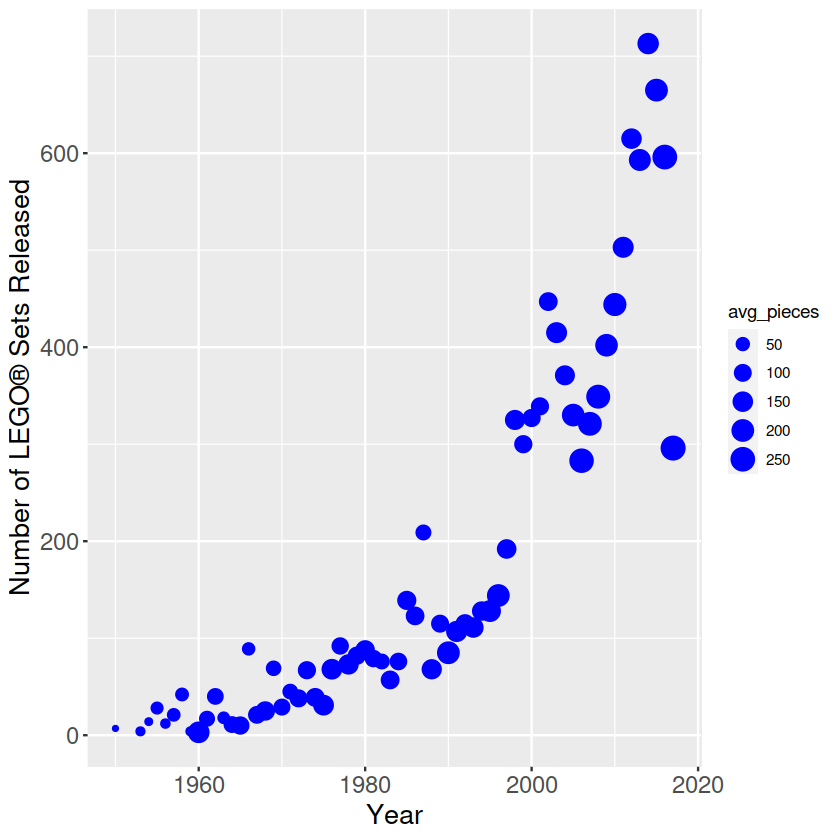

In [143]:
ggplot(byyear) +
  geom_point(aes(x=year, y=count, size=avg_pieces), color="blue") +
  xlab("Year") + ylab("Number of LEGO® Sets Released") +
  theme(axis.title=element_text(size=16), axis.text=element_text(size=14))

There's a drop-off in 2017, which may have to do with missing data. How would we remove that year in the plot above by using *dplyr* on the dataset itself?

We might also ask the question of how many sets each theme has:

In [148]:
theme_count <- lego %>% group_by(theme) %>% summarize(count=n())

head(theme_count)

theme,count
<chr>,<int>
4 Juniors,17
9V,59
Advent,33
Advent Sub-Set,625
Adventurers,83
Agents,28


### 3.5. `arrange()`

This function is used to sort a dataframe by some column, either from lowest to highest or highest to lowest. This has its uses in data visualization (for ordering a column chart), but it is most useful when combined with `head()` to see the largest or smallest values. For example, let's find the themes that have the most sets associated with them:



In [147]:
theme_count %>% arrange(-count) %>% head()

theme,count
<chr>,<int>
Advent Sub-Set,625
Service Packs,549
Star Wars,538
Collectible Minifigures,441
Universal Building Set,441
Gear,433


### 3.6. `inner_join()`

An inner join is a way of combining two dataframes and looking for matches on some particular column. In one of the two dataframes, that column must be a key.

For example, I could combine the `lego` dataframe with the `theme_count` dataframe by joining on the theme column, as both dataframes have a column containing information about LEGO® themes and have exact matches. The theme column is a key in `theme_count`, but *is not* in `lego`. In database terminology, it's a *primary key* in `theme_count` but a *foreign key* pointing to a key in another table.

In [153]:
lego %>% inner_join(theme_count) %>% head()

Joining, by = "theme"


,name,year,pieces,theme,yearsafter,peryear,count
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>
1,Weetabix Castle,1970,471,Legoland,21,22.42857143,141
2,Town Mini-Figures,1978,12,Classic Town,29,0.41379310,429
3,Castle 2 for 1 Bonus Offer,1987,2,Castle,38,0.05263158,256
4,Space Mini-Figures,1979,12,Space,30,0.40000000,332
5,Space Mini-Figures,1979,12,Space,30,0.40000000,332
6,Space Mini-Figures,1979,12,Space,30,0.40000000,332


By default, `inner_join()` assumes you want to join on columns with the same name (there's a note above showing its assumption), but we could've added a `by=` argument stating explicitly which columns. The call would've been `inner_join(theme_count, by=c("theme" = "theme"))`. Note that the column names are in quotation marks here, which is inconsistent with other parts of dplyr.

### 4. Re-Creating the Dataset
In the previous notes, I supplied a simpler dataset about LEGO® sets, including only themes which had a large number of sets. We've got the pieces to do that now. First, I'm going to reset the `lego` dataframe by throwing away the new columns.

In [156]:
lego <- lego %>% select(-yearsafter, -peryear)

Now, we'll look at the list of themes and only keep the biggest ones. The cut-off was chosen by tweaking little by little until there were only a few total themes.

In [168]:
theme_count %>% filter(count >= 300)

theme,count
<chr>,<int>
Advent Sub-Set,625
Bionicle,417
City,354
Classic,330
Classic Town,429
Collectible Minifigures,441
Creator,335
Gear,433
Service Packs,549


Of these, there are a few that aren't interesting: "Advent Sub-Set" means . Similarly, I'd like to remove "Collectible Minifigures", "Gear", and "Service Packs"

In [172]:
big_themes <- theme_count %>% filter(count >= 300) %>%
  filter(theme != "Advent Sub-Set") %>% filter(theme != "Gear") %>%
  filter(theme != "Service Packs") %>% filter(theme != "Collectible Minifigures")

big_themes

theme,count
<chr>,<int>
Bionicle,417
City,354
Classic,330
Classic Town,429
Creator,335
Space,332
Star Wars,538
Technic,350
Universal Building Set,441


*Now* if we `inner_join()` to the original `lego` dataframe, any themes outside of this list will be dropped. Why? Because `inner_join()` looks for matches between the two dataframes, and there will be no matches to (for example) the sets listed in `lego` with the "Gear" theme.

In [174]:
lego_reduced <- lego %>% inner_join(big_themes %>% select(theme))

head(lego_reduced)

Joining, by = "theme"


,name,year,pieces,theme
,<chr>,<int>,<int>,<chr>
1,Town Mini-Figures,1978,12,Classic Town
2,Space Mini-Figures,1979,12,Space
3,Space Mini-Figures,1979,12,Space
4,Space Mini-Figures,1979,12,Space
5,Space Mini-Figures,1979,18,Space
6,Basic Building Set in Cardboard,1965,35,Classic


Just to show that this has cut the dataset down substantially, you can check how many rows are in the original and reduced dataset:

In [177]:
nrow(lego)

[1] 11673

In [176]:
nrow(lego_reduced)

[1] 3526

And you're ready for some new visualizations:

In [179]:
theme_avg <- lego_reduced %>% group_by(theme) %>% summarize(avg_pieces = mean(pieces))

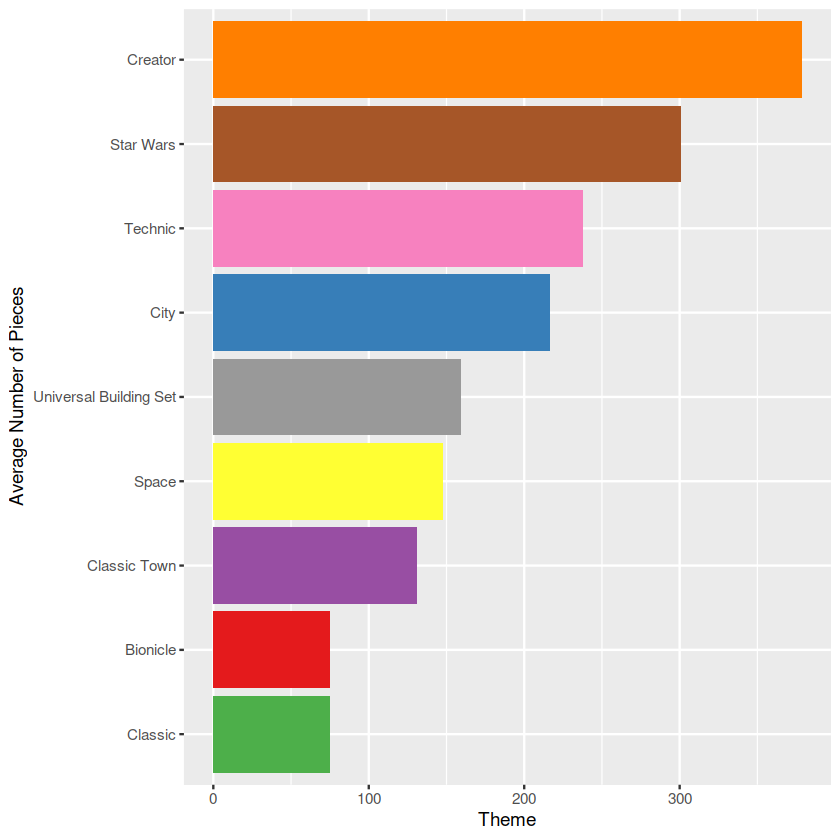

In [190]:
ggplot(theme_avg) + 
  geom_bar(aes(x=reorder(theme, avg_pieces), y=avg_pieces, fill=theme), stat="identity") +
  coord_flip() +
  xlab("Average Number of Pieces") + ylab("Theme") +
  scale_fill_brewer(palette="Set1") +
  theme(legend.position="none")

### 5. Pandas Equivalents

If you've studied Python previously, you may be familiar with some of these functions, although they are implemented differently. I honestly find Panda's method of doing data manipulation to be much more confusing, as it mixes functions like `len()`, methods like `.group_by()`, and indexing like `.loc[]`

| Task        | *dplyr* | Pandas | SQL |
| ---------------- | ------------------- | ----------------------- | -- |
| selecting  | `select()`   | `[["col1","col2"]]`             | SELECT|
| filtering  | `filter()`   | `.loc[]` | WHERE |
| rename     | `rename()`   | `.rename()` | AS |
| new column | `mutate()`   | just assign it | |
| grouping   | `group_by()` | `.group_by()` | GROUP BY |
| statistics | `summarize()` | various methods | various functions |
| sort       | `arrange()`  | `.sort_values()` | ORDER BY |
| inner join | `inner_join()` | `join()` | INNER JOIN |

___
##### References.

* [Introduction to dplyr](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html)